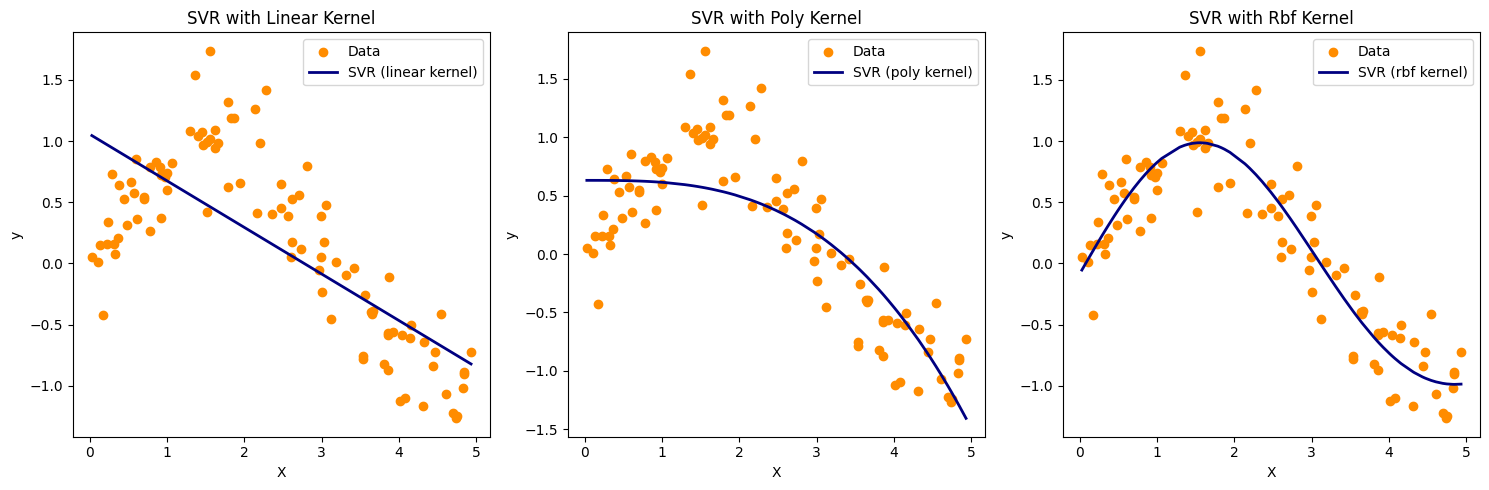

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.3 * np.random.randn(100)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVR models with different kernels
kernels = ['linear', 'poly', 'rbf']
models = {
    kernel: SVR(kernel=kernel, C=100, gamma=0.1, epsilon=0.1, degree=3) for kernel in kernels
}

# Train and predict using each kernel
plt.figure(figsize=(15, 5))
for i, kernel in enumerate(kernels, 1):
    model = models[kernel]
    model.fit(X_train, y_train)
    y_pred = model.predict(X)

    # Plot the results
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='darkorange', label='Data')
    plt.plot(X, y_pred, color='navy', lw=2, label=f'SVR ({kernel} kernel)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'SVR with {kernel.capitalize()} Kernel')
    plt.legend()

plt.tight_layout()
plt.show()